<a href="https://colab.research.google.com/github/hembasnet/IPL-Score-Preditction-using-deep-learning/blob/main/IPl_Score_Predtiction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings("ignore")

In [34]:
ipl = pd.read_csv('/content/ipl2024 Matches (1).csv')
ipl.head(10)

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts
0,1,"March 22,2024",Banglore,Chennai,Banglore,Bat,173,6,176,4,Chennai,Mustafizur Rahman,Anuj Rawat,Mustafizur Rahman
1,2,"March 23,2024",Delhi,Punjab,Punjab,Field,174,9,177,6,Punjab,Sam Curran,Sam Curran,Kuldeep Yadav
2,3,"March 23,2024",Kolkata,Hyderabad,Hyderabad,Field,208,7,204,7,Kolkata,Andre Russell,Andre Russell,T Natarajan
3,4,"March 24,2024",Rajasthan,Lucknow,Rajasthan,Bat,193,4,173,6,Rajasthan,Sanju Samson,Sanju Samson,Trent Boult
4,5,"March 24,2024",Gujarat,Mumbai,Mumbai,Field,168,6,162,9,Gujarat,Sai Sudharsan,Dewald Brevis,Jasprit Bumrah
5,6,"March 25,2024",Punjab,Banglore,Banglore,Field,176,6,178,6,Banglore,Virat Kohli,Virat Kohli,Harpreet Brar
6,7,"March 26,2024",Chennai,Gujarat,Gujarat,Field,206,6,143,8,Chennai,Shivam Dube,Shivam Dube,Tushar Deshpande
7,8,"March 27,2024",Hyderabad,Mumbai,Mumbai,Field,277,3,246,5,Hyderabad,Abhishek Sharma,Heinrich Klaasen,Pat Cummins
8,9,"March 28,2024",Rajasthan,Delhi,Delhi,Field,185,5,173,5,Rajasthan,Riyan Parag,Riyan Parag,Yuzvendra Chahal
9,10,"March 29,2024",Banglore,Kolkata,Kolkata,Field,182,6,186,3,Kolkata,Sunil Narine,Virat Kohli,Andre Russell


In [35]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   74 non-null     int64 
 1   date                 74 non-null     object
 2   team1                74 non-null     object
 3   team2                74 non-null     object
 4   toss_winner          74 non-null     object
 5   decision             71 non-null     object
 6   first_score          74 non-null     int64 
 7   first_wkts           74 non-null     int64 
 8   second_score         74 non-null     int64 
 9   second_wkts          74 non-null     int64 
 10  winner               74 non-null     object
 11  player_of_the_match  71 non-null     object
 12  most_runs            71 non-null     object
 13  most_wkts            71 non-null     object
dtypes: int64(5), object(9)
memory usage: 8.2+ KB


In [36]:
data = ipl.copy()
ipl_no_duplicate = data.drop_duplicates()
ipl_no_duplicate.head(10)

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts
0,1,"March 22,2024",Banglore,Chennai,Banglore,Bat,173,6,176,4,Chennai,Mustafizur Rahman,Anuj Rawat,Mustafizur Rahman
1,2,"March 23,2024",Delhi,Punjab,Punjab,Field,174,9,177,6,Punjab,Sam Curran,Sam Curran,Kuldeep Yadav
2,3,"March 23,2024",Kolkata,Hyderabad,Hyderabad,Field,208,7,204,7,Kolkata,Andre Russell,Andre Russell,T Natarajan
3,4,"March 24,2024",Rajasthan,Lucknow,Rajasthan,Bat,193,4,173,6,Rajasthan,Sanju Samson,Sanju Samson,Trent Boult
4,5,"March 24,2024",Gujarat,Mumbai,Mumbai,Field,168,6,162,9,Gujarat,Sai Sudharsan,Dewald Brevis,Jasprit Bumrah
5,6,"March 25,2024",Punjab,Banglore,Banglore,Field,176,6,178,6,Banglore,Virat Kohli,Virat Kohli,Harpreet Brar
6,7,"March 26,2024",Chennai,Gujarat,Gujarat,Field,206,6,143,8,Chennai,Shivam Dube,Shivam Dube,Tushar Deshpande
7,8,"March 27,2024",Hyderabad,Mumbai,Mumbai,Field,277,3,246,5,Hyderabad,Abhishek Sharma,Heinrich Klaasen,Pat Cummins
8,9,"March 28,2024",Rajasthan,Delhi,Delhi,Field,185,5,173,5,Rajasthan,Riyan Parag,Riyan Parag,Yuzvendra Chahal
9,10,"March 29,2024",Banglore,Kolkata,Kolkata,Field,182,6,186,3,Kolkata,Sunil Narine,Virat Kohli,Andre Russell


In [37]:
date_count = ipl_no_duplicate['date'].value_counts()
winner_count = ipl_no_duplicate['winner'].value_counts()

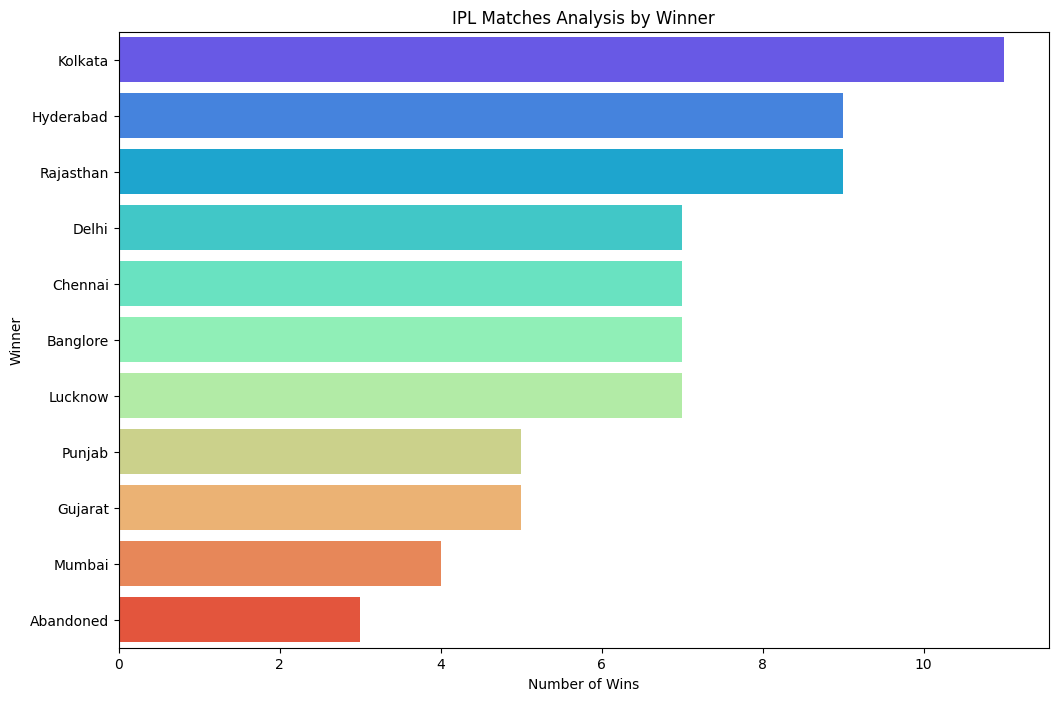

In [38]:
plt.figure(figsize=(12, 8))
sns.barplot(x=winner_count.values,  y=winner_count.index , palette = "rainbow")
plt.title('IPL Matches Analysis by Winner')
plt.xlabel('Number of Wins')
plt.ylabel('Winner')
plt.show()

In [39]:
# Note: This code assumes you want to find the maximum runs scored by players who were 'player_of_the_match'.
# If you want to analyze the 'most_runs' column directly, the approach would be different.
most_runs = data.groupby('most_wkts')['most_runs'].max().sort_values(ascending=False).head(10)
display(most_runs)

,most_runs
most_wkts,
Sandeep Sharma,Yashasvi Jaiswal
Kagiso Rabada,Yashasvi Jaiswal
Avesh Khan,Yashasvi Jaiswal
Andre Russell,Will Jacks
Swapnil Singh,Will Jacks
Harpreet Brar,Virat Kohli
Harshal Patel,Virat Kohli
Jaydev Unadkat,Virat Kohli
Reece Topley,Virat Kohli


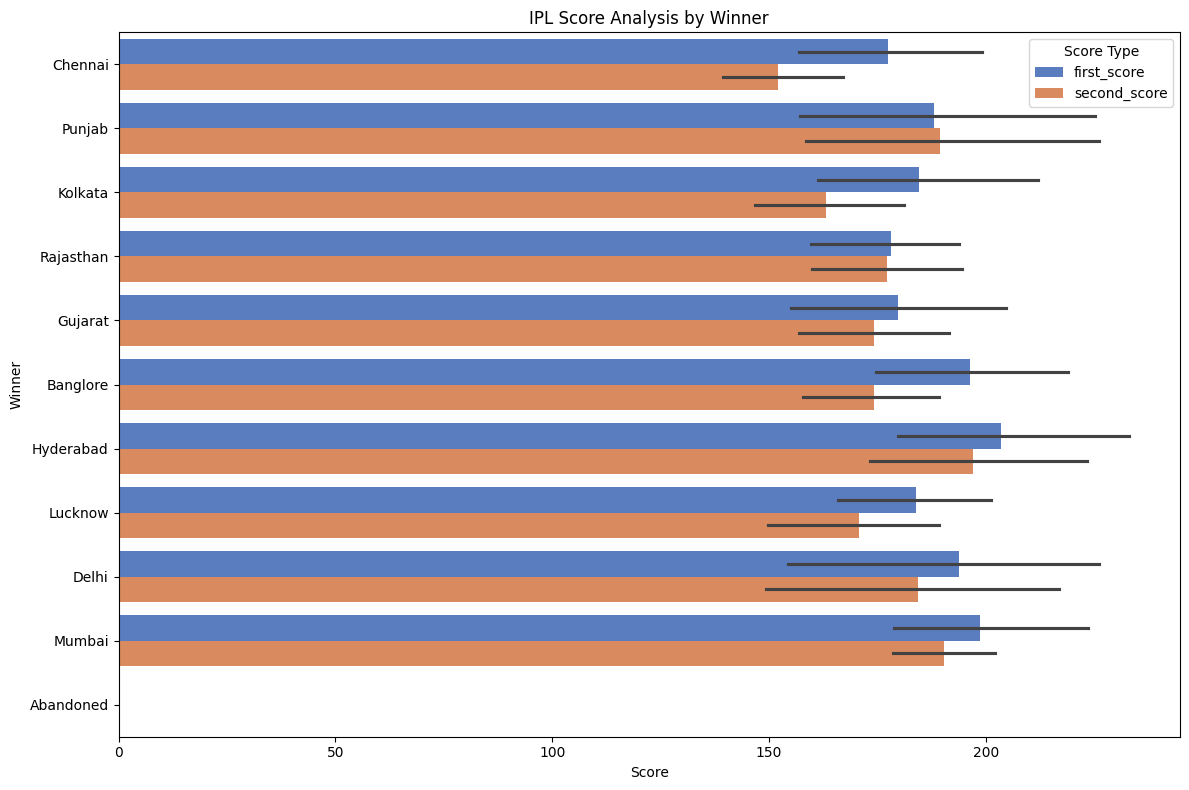

In [40]:
score_data = ipl_no_duplicate.melt(id_vars=['winner'], value_vars=['first_score', 'second_score'], var_name='Score Type', value_name='Score')

plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='winner', hue='Score Type', data=score_data, palette="muted")
plt.title('IPL Score Analysis by Winner')
plt.xlabel('Score')
plt.ylabel('Winner')
plt.tight_layout()
plt.show()

In [41]:
cat_cols = ['team1', 'team2', 'decision', 'winner', 'toss_winner', 'player_of_the_match', 'most_runs', 'most_wkts']
ipl_encoded = data.copy()
label_encoders = {}
for col in cat_cols:
  le = LabelEncoder()
  # Handle potential NaN values in columns before fitting and transforming
  ipl_encoded[col]= le.fit_transform(data[col].astype(str))
  label_encoders[col] = le

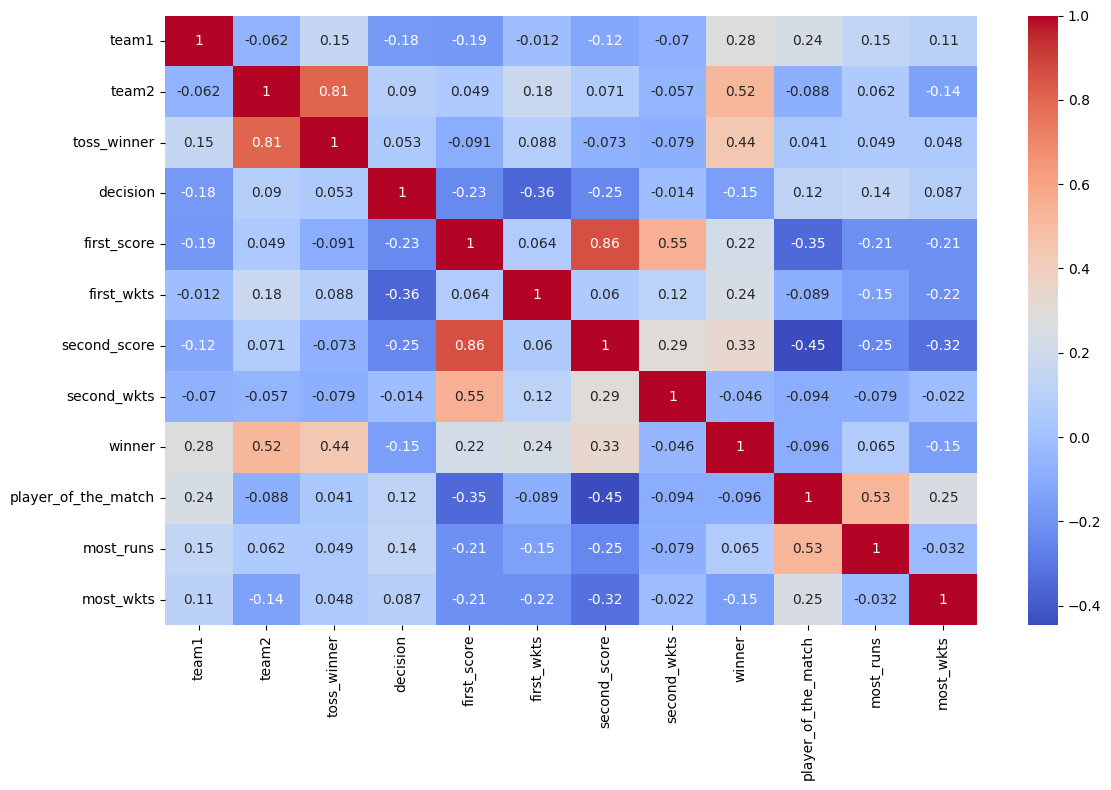

In [42]:
data_corr = ipl_encoded.drop(columns=["id","date"], axis=1)
plt.figure(figsize=(12, 8))
sns.heatmap(data_corr.corr(), annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

In [43]:
ipl = pd.read_csv('/content/ipl2024 Matches (1).csv')

data = ipl.copy()
ipl_no_duplicate = data.drop_duplicates()

cat_cols = ['team1', 'team2', 'decision', 'winner', 'toss_winner', 'player_of_the_match', 'most_runs', 'most_wkts']
ipl_encoded = data.copy()
label_encoders = {}
for col in cat_cols:
  le = LabelEncoder()
  # Handle potential NaN values in columns before fitting and transforming
  ipl_encoded[col]= le.fit_transform(data[col].astype(str))
  label_encoders[col] = le

feature_cols = ['team1', 'team2', 'first_score', 'second_score']

X = ipl_encoded[feature_cols]
y = ipl_encoded['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
model = keras.Sequential([
    keras.Input(shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='linear'),

])

huber_toss = tf.keras.losses.Huber(delta=1.0)
model.compile(optimizer='adam', loss=huber_toss)

In [46]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)
(X_test_scaled, y_test)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 5.0590
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4.6513
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 4.3590
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 4.0821
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 3.6449
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 3.3331
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 3.0032
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.3992
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.1224
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.7825
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.7030
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.6671
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.9110
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.8939
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.8244 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━

(array([[0.33333333, 0.77777778, 0.60649819, 0.61832061],
        [0.22222222, 0.66666667, 0.75090253, 0.72137405],
        [0.        , 1.        , 0.66064982, 0.72137405],
        [0.        , 0.11111111, 0.62454874, 0.67175573],
        [0.11111111, 0.77777778, 0.74368231, 0.70992366],
        [0.44444444, 0.55555556, 0.40794224, 0.4351145 ],
        [0.66666667, 0.88888889, 0.71841155, 0.67938931],
        [0.44444444, 0.22222222, 0.96028881, 0.75954198],
        [0.22222222, 0.11111111, 0.68953069, 0.65267176],
        [0.22222222, 1.        , 0.79783394, 0.76717557],
        [0.44444444, 0.33333333, 0.        , 0.        ],
        [0.33333333, 0.22222222, 0.32129964, 0.35114504],
        [0.        , 0.55555556, 0.65703971, 0.70992366],
        [0.11111111, 0.44444444, 0.76534296, 0.51145038],
        [0.88888889, 0.        , 0.63537906, 0.67938931]]),
 4      4
 63     3
 18    10
 0      2
 28     2
 73     6
 10     7
 34     5
 12     3
 55     3
 65     0
 31     3
 9      

<Axes: >

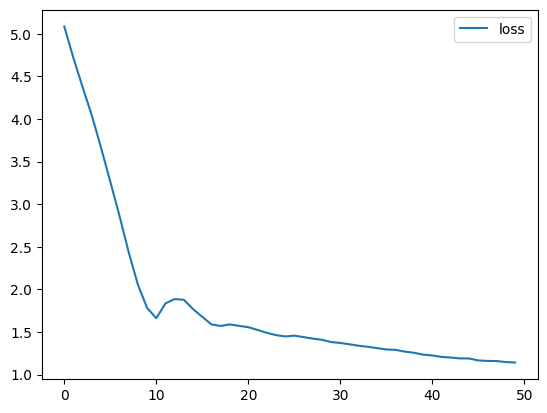

In [47]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [48]:
predictions = model.predict(X_test_scaled)
mean_absolute_error(y_test,predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


1.8883137702941895

In [49]:
def on_predict_button_click(b):
    with output:
        clear_output(wait=True)

        # Ensure all necessary label encoders are defined
        cat_cols_input = ['team1', 'team2', 'toss_winner', 'decision']
        input_dict = {}
        for col in cat_cols_input:
            input_dict[col] = [label_encoders[col].transform([globals()[col].value])[0]]

        # Add numerical features
        input_dict['first_score'] = [first_score.value]
        input_dict['second_score'] = [second_score.value]

        # Create DataFrame and select only the features used for training
        ipl_encoded_input = pd.DataFrame(input_dict)
        feature_cols = ['team1', 'team2', 'first_score', 'second_score']
        ipl_encoded_input = ipl_encoded_input[feature_cols]

        # Scale the input
        input_scaled = scaler.transform(ipl_encoded_input)

        # Make prediction
        predicted_winner_encoded = model.predict(input_scaled)[0][0]

        # Inverse transform the prediction to get the team name
        # Since the model is predicting a continuous value, we need to find the closest team
        closest_team_index = round(predicted_winner_encoded)
        # Ensure the index is within the range of classes in the winner label encoder
        closest_team_index = max(0, min(closest_team_index, len(label_encoders['winner'].classes_) - 1))

        predicted_winner_name = label_encoders['winner'].inverse_transform([closest_team_index])[0]


        print(f"Predicted Winner: {predicted_winner_name}")

predict_button.on_click(on_predict_button_click)

display(team1, team2, first_score, second_score, toss_winner, decision, predict_button, output)

Dropdown(description='Select Team 1:', options=('Banglore', 'Chennai', 'Delhi', 'Gujarat', 'Hyderabad', 'Kolka…

Dropdown(description='Select Team 2:', index=1, options=('Banglore', 'Chennai', 'Delhi', 'Gujarat', 'Hyderabad…

IntText(value=170, description='First Score:')

IntText(value=170, description='Second Score:')

Dropdown(description='Select Toss Winner:', options=('Banglore', 'Chennai', 'Delhi', 'Gujarat', 'Hyderabad', '…

Dropdown(description='Select Decision:', options=('Bat', 'Field', 'nan'), value='Bat')

Button(description='Predict Winner', style=ButtonStyle())

Output()